 #  A Whale off the Port(folio)

In this assignment, I evaluated the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P 500.

In [1]:
# Import libraries and dependencies
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import pandas_datareader as pdr
%matplotlib inline

# 1 - Data Cleaning
In this section,  I read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.
Files:
1. whale_returns.csv
2. algo_returns.csv
3. sp500_history.csv

### Whale Returns

* reading Whale Portfolio daily returns and cleaning the data

In [2]:
# Reading whale returns
whale_returns_csv = Path("Resources/whale_returns.csv")
whale_returns = pd.read_csv(whale_returns_csv, index_col= "Date" , parse_dates=True, infer_datetime_format=True)
whale_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [3]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [4]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      0
PAULSON & CO.INC.              0
TIGER GLOBAL MANAGEMENT LLC    0
BERKSHIRE HATHAWAY INC         0
dtype: int64

### Algorithmic Daily Returns

Reading the algorithmic daily returns and cleanintg the data

In [5]:
# Reading algorithmic returns
algo_returns_csv = Path("Resources/algo_returns.csv")
algo_returns = pd.read_csv(algo_returns_csv, index_col= "Date" , parse_dates=True, infer_datetime_format=True)
algo_returns.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [6]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [7]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns.isnull().sum()

Algo 1    0
Algo 2    0
dtype: int64

### S&P 500 Returns

Reading the S&P500 Historic Closing Prices and creating a new daily returns DataFrame from the data. 

In [8]:
# Reading S&P 500 Closing Prices
sp500_history_csv = Path("Resources/sp500_history.csv")
sp500_history = pd.read_csv(sp500_history_csv, index_col= "Date", parse_dates=True, infer_datetime_format=True)
sp500_history.sort_values(by=['Date'], inplace=True, ascending= True)
sp500_history.head()

,Close
Date,
2012-10-01,$1444.49
2012-10-02,$1445.75
2012-10-03,$1450.99
2012-10-04,$1461.40
2012-10-05,$1460.93


In [9]:
# Check Data Types
sp500_history.dtypes

Close    object
dtype: object

In [10]:
# Fix Data Types
# 1- Clean "Close" price by replacing $
sp500_history["Close"] = sp500_history["Close"].str.replace('$', '')

In [11]:
# Fix Data Types
# 2- Cast "Close" as float
sp500_history["Close"] = sp500_history["Close"].astype("float")
sp500_history.dtypes

Close    float64
dtype: object

In [12]:
# Calculate Daily Returns - I prefered to calculate the daily return using the 'pct_change()' function
sp500_returns = sp500_history.pct_change()
sp500_returns.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322


In [13]:
# Cleaning nulls from DataFrame by dropping
sp500_returns.dropna(inplace=True)
sp500_returns.head()

,Close
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


In [14]:
# Rename Column
sp500_returns.rename(columns = {'Close':'S&P 500'},inplace = True) 
sp500_returns.head()

,S&P 500
Date,
2012-10-02,0.000872
2012-10-03,0.003624
2012-10-04,0.007174
2012-10-05,-0.000322
2012-10-08,-0.003457


### Combine Whale, Algorithmic, and S&P 500 Returns

In [15]:
# Concatenate all DataFrames into a single DataFrame
whale_algo_Sp500_returns = pd.concat([whale_returns, algo_returns, sp500_returns], axis="columns", join="inner")

whale_algo_Sp500_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.004539
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.004389
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001196
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.014174
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,0.003944


---

# 2 - Portfolio Analysis

In this section, I calculated and visualized performance and risk metrics for the portfolios.

## Performance

Calculating and Ploting the daily returns and cumulative returns. 
* Does any portfolio outperform the S&P 500?

### Answer:

* In the "Daily Returns" plot, I am not able to see which portfolio is outperform the S&P 500, but Tiger and BHI have some one-day volitilities. 
* In the **"Cumulative Returns" plot**, I can easily see that **the most outperformed** portfolios are **Algo1 and BERKSHIRE HATHAWAY INC .**

(735670.0, 737172.0)

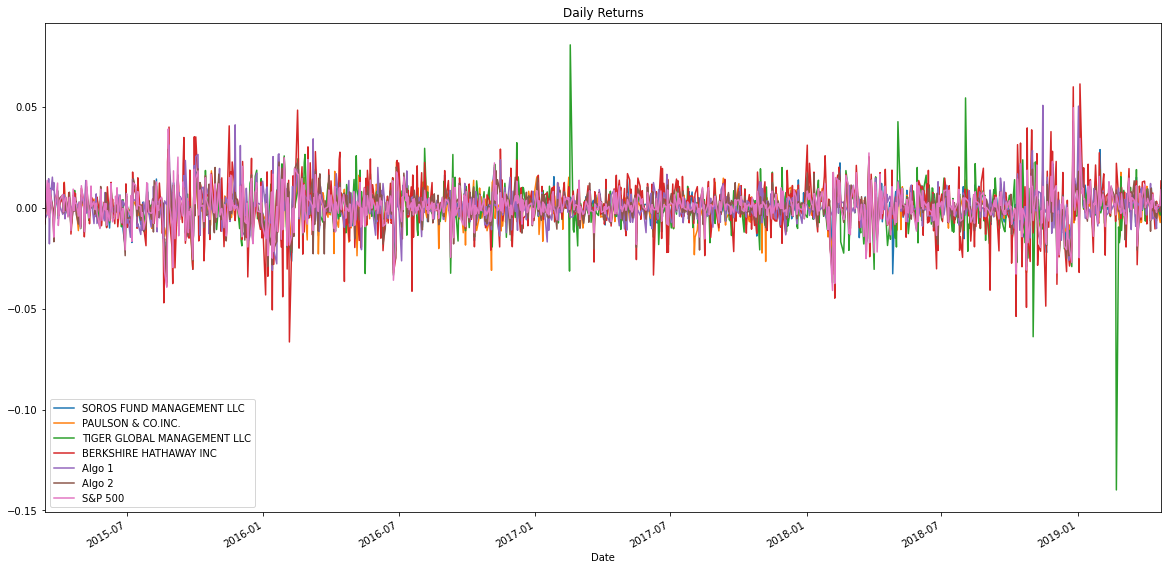

In [16]:
# Plot daily returns

plot_daily_returns = whale_algo_Sp500_returns.plot(figsize=(20,10),title='Daily Returns')

plot_daily_returns.set_xlim(pd.Timestamp('2015-03-13'), pd.Timestamp('2019-04-23'))



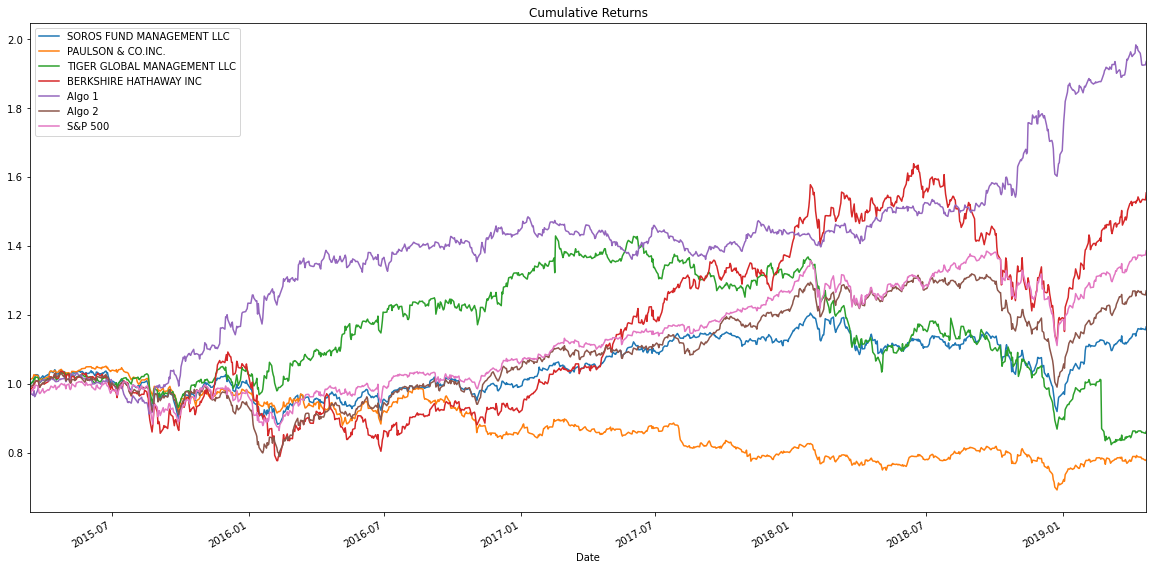

In [17]:
# Plot cumulative returns
whale_algo_Sp500_returns_cum = (whale_algo_Sp500_returns + 1).cumprod()

plot_cum_returns= whale_algo_Sp500_returns_cum.plot(figsize=(20,10),title='Cumulative Returns')

plot_cum_returns.set_xlim(pd.Timestamp('2015-03-13'), pd.Timestamp('2019-04-23'));

## Risk

Determine the _risk_ of each portfolio:

1. Created a box plot for each portfolio. 
2. Calculated the standard deviation for all portfolios
3. Determine which portfolios are riskier than the S&P 500
4. Calculated the Annualized Standard Deviation

## Answers
1. * In the **"Portfolio Risk" plot**, **BERKSHIRE HATHAWAY INC ** has **the largest** spread which means that It has the largest deviation in the daily returns.
   * **PAULSON & CO.INC.** has **the smallest** spread which means that It has the smallest deviation in the daily percentage change.

3. * When I checked the standard deviations of all portfolios, both **BERKSHIRE HATHAWAY INC (0.012919) and TIGER GLOBAL MANAGEMENT LLC (0.010894)** have higher standard deviations than S&P 500 (0.008342). This means these portfolios are **riskier** than the S&P 500 .



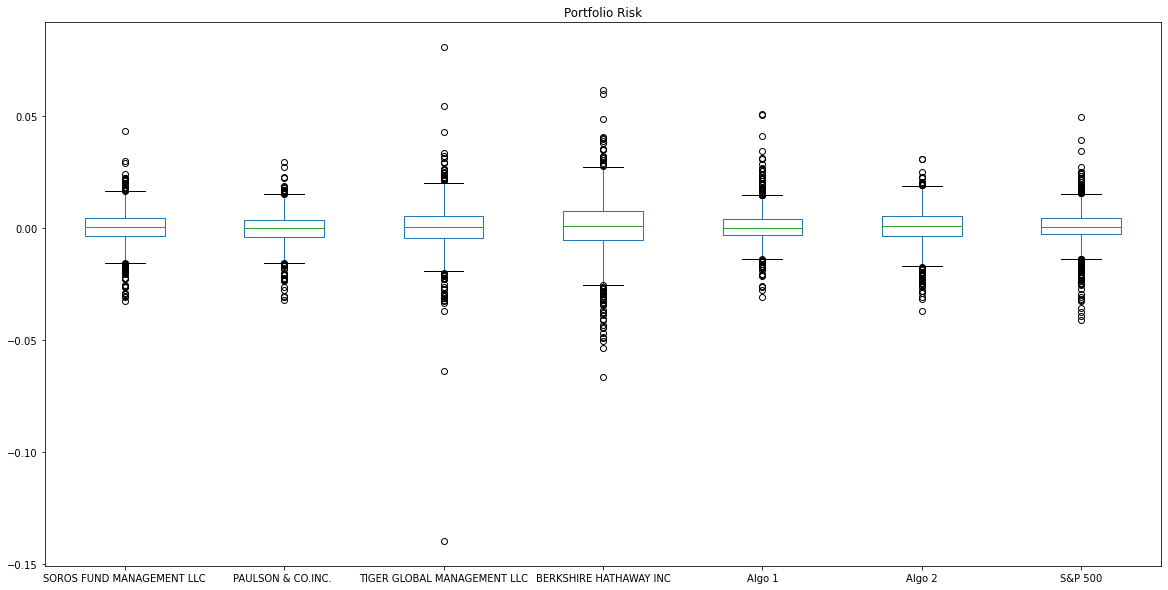

In [18]:
# Box plot to visually show risk
whale_algo_Sp500_returns.plot.box(figsize=(20,10),title="Portfolio Risk")

In [19]:
# Daily Standard Deviations
# Calculate the standard deviation for each portfolio. 
whale_algo_Sp500_returns.std()

SOROS FUND MANAGEMENT LLC      0.007895
PAULSON & CO.INC.              0.007023
TIGER GLOBAL MANAGEMENT LLC    0.010894
BERKSHIRE HATHAWAY INC         0.012919
Algo 1                         0.007620
Algo 2                         0.008342
S&P 500                        0.008554
dtype: float64

In [20]:
# Determine which portfolios are riskier than the S&P 500
sp500_returns = whale_algo_Sp500_returns[ 'S&P 500' ].std()
whale_algo_Sp500_returns.std() > sp500_returns

SOROS FUND MANAGEMENT LLC      False
PAULSON & CO.INC.              False
TIGER GLOBAL MANAGEMENT LLC     True
BERKSHIRE HATHAWAY INC          True
Algo 1                         False
Algo 2                         False
S&P 500                        False
dtype: bool

In [21]:
# Calculate the annualized standard deviation (252 trading days)
annual_std=whale_algo_Sp500_returns.std()*np.sqrt(252)
annual_std

SOROS FUND MANAGEMENT LLC      0.125335
PAULSON & CO.INC.              0.111488
TIGER GLOBAL MANAGEMENT LLC    0.172936
BERKSHIRE HATHAWAY INC         0.205077
Algo 1                         0.120967
Algo 2                         0.132430
S&P 500                        0.135786
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyzed the rolling statistics for Risk and Beta. 

1. Plot the rolling standard deviation of the various portfolios along with the rolling standard deviation of the S&P 500 (consider a 21 day window). Does the risk increase for each of the portfolios at the same time risk increases in the S&P?
2. Construct a correlation table for the algorithmic, whale, and S&P 500 returns. Which returns most closely mimic the S&P?
3. Choose one portfolio and plot a rolling beta between that portfolio's returns and S&P 500 returns. Does the portfolio seem sensitive to movements in the S&P 500?
4. An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the ewm with a 21 day half-life.

## Answers
1. * When I checked the **"21 Day Rolling Standard Deviation" plot** , It seems that all portfolios have been moving with the S&P 500. Specifically, **BERKSHIRE HATHAWAY INC** has a greater standard deviation,and it is more volatile than the other portfolios. 
2. * **Algo 2** has the best mimic SP500, means that **Algo 2** has **the best correlation** to SP500.
3. * **BERKSHIRE HATHAWAY INC beta** is **1.134.** This suggests that for every +1% move in the S&P 500 our portfolio will go up 1,134 % in value.

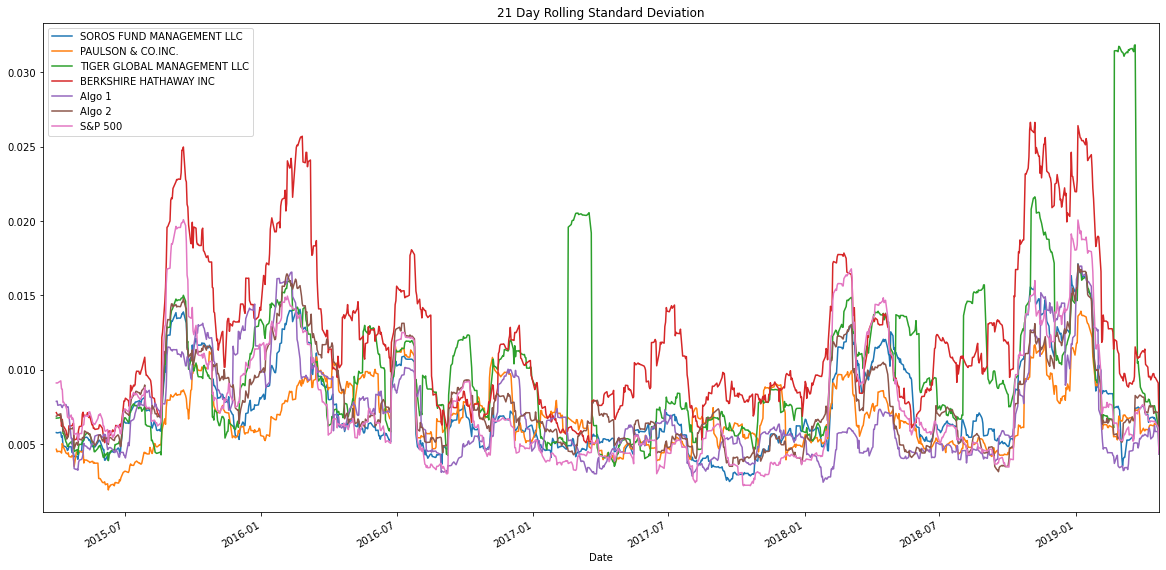

In [22]:
# Calculate and plot the rolling standard deviation for
# the S&P 500 and whale portfolios using a 21 trading day window
all_portfolios_roll_std = whale_algo_Sp500_returns.rolling(window=21).std()
all_portfolios_roll_std.plot(figsize=(20,10),title="21 Day Rolling Standard Deviation").set_xlim(pd.Timestamp('2015-03-13'), pd.Timestamp('2019-04-23'));

In [23]:
# Construct a correlation table
corr_df = whale_algo_Sp500_returns.corr()
corr_df

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500
SOROS FUND MANAGEMENT LLC,1.000000,0.699914,0.561243,0.754360,0.321211,0.826873,0.837864
PAULSON & CO.INC.,0.699914,1.000000,0.434479,0.545623,0.268840,0.678152,0.669732
TIGER GLOBAL MANAGEMENT LLC,0.561243,0.434479,1.000000,0.424423,0.164387,0.507414,0.623946
BERKSHIRE HATHAWAY INC,0.754360,0.545623,0.424423,1.000000,0.292033,0.688082,0.751371
Algo 1,0.321211,0.268840,0.164387,0.292033,1.000000,0.288243,0.279494
Algo 2,0.826873,0.678152,0.507414,0.688082,0.288243,1.000000,0.858764
S&P 500,0.837864,0.669732,0.623946,0.751371,0.279494,0.858764,1.000000


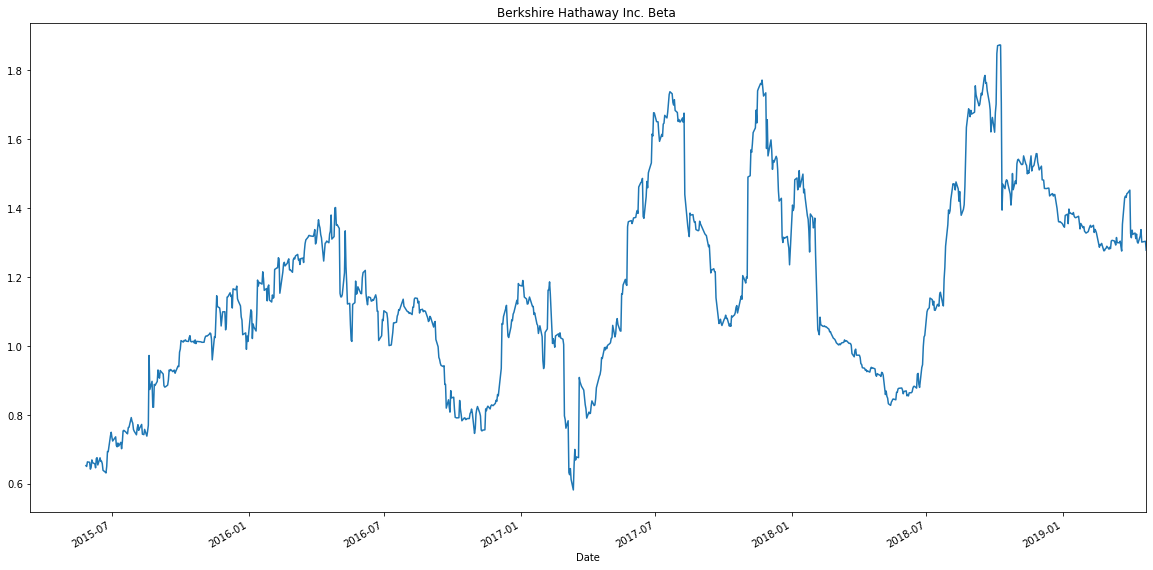

In [24]:
# Calculate Beta for a single portfolio compared to the total market (S&P 500)
# (Your graph may differ, dependent upon which portfolio you are comparing)

# calculuate covariance
covariance = whale_algo_Sp500_returns['BERKSHIRE HATHAWAY INC'].rolling(window=60).cov(whale_algo_Sp500_returns['S&P 500'])

#variance of the general market
variance = whale_algo_Sp500_returns['S&P 500'].rolling(window=60).var()

# get the beta
beta = covariance/variance

#plotting beta over time
beta.plot(figsize=(20,10), title="Berkshire Hathaway Inc. Beta ").set_xlim(pd.Timestamp('2015-03-13'), pd.Timestamp('2019-04-23'));


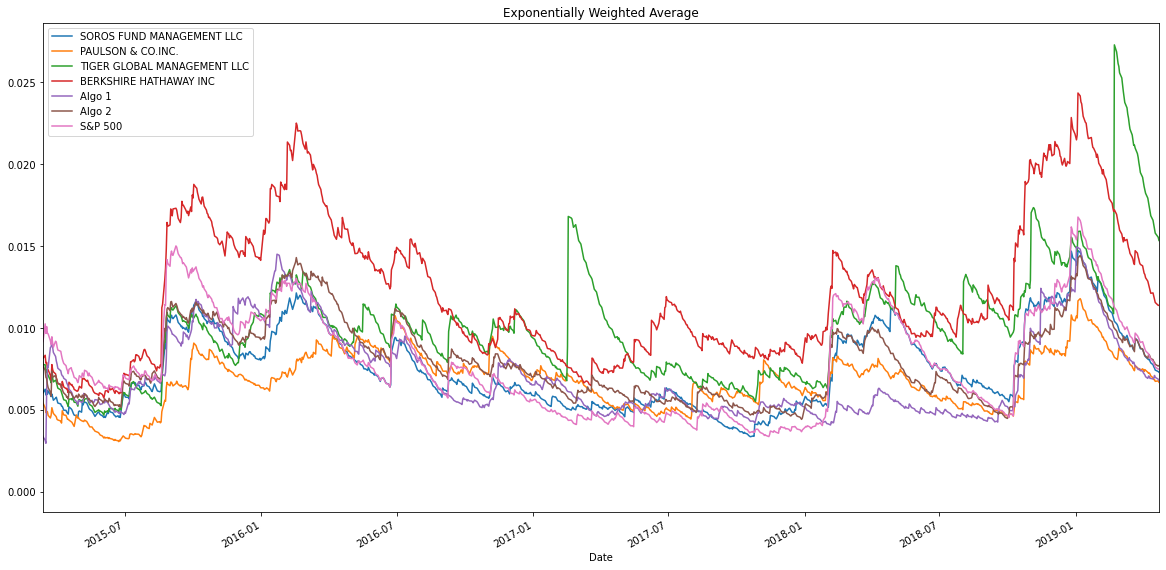

In [25]:
# Calculate a rolling window using the exponentially weighted moving average. 
whale_algo_Sp500_returns.ewm(halflife=21).std().plot(figsize=(20,10), title="Exponentially Weighted Average").set_xlim(pd.Timestamp('2015-03-13'), pd.Timestamp('2019-04-23'));

---

## Sharpe Ratios
### looking at the ratio of return-to-risk.

1. Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot.
2. Determine whether the algorithmic strategies outperform both the market (S&P 500) and the whales portfolios.

In [26]:
# Calculate annualized Sharpe Ratios
shape_ratios = (whale_algo_Sp500_returns.mean() * 252) / (whale_algo_Sp500_returns.std() * np.sqrt(252))
shape_ratios

SOROS FUND MANAGEMENT LLC      0.356417
PAULSON & CO.INC.             -0.483570
TIGER GLOBAL MANAGEMENT LLC   -0.121060
BERKSHIRE HATHAWAY INC         0.621810
Algo 1                         1.378648
Algo 2                         0.501364
S&P 500                        0.648267
dtype: float64

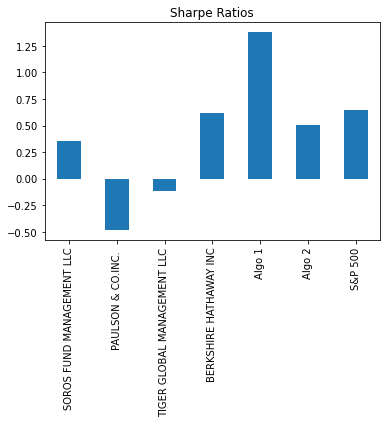

In [27]:
# Visualize the sharpe ratios as a bar plot
shape_ratios.plot(kind='bar', title='Sharpe Ratios')

On the basis of this performance metric, do our algo strategies outperform both 'the market' and the whales? Type your answer here: **Algo 1 outperformed S&P500 and whales while Algo 2 fell below S&P500  and BERKSHIRE HATHAWAY INC.**

--- 


# Portfolio Returns

In this section, I built my customize portfolio of stocks, calculated the returns, and compared the results to the Whale Portfolios and the S&P 500. 

1. Visit [Google Sheets](https://docs.google.com/spreadsheets/) and use the in-built Google Finance function to choose 3-5 stocks for my customize portfolio.
2. Download the data as CSV files and calculate the portfolio returns.
3. Calculated the returns for each stock.
4. Using those returns, calculated the weighted returns for my entire portfolio assuming an equal number of shares for each stock.
5. Add your portfolio returns to the DataFrame with the other portfolios and rerun the analysis. How does my portfolio fair?


## Your analysis should include the following:

- Using all portfolios:
 - The annualized standard deviation (252 trading days) for all portfolios.
 - The plotted rolling standard deviation using a 21 trading day window for all portfolios.
 - The calculated annualized Sharpe Ratios and the accompanying bar plot visualization.
 - A correlation table.
- Using your custom portfolio and one other of your choosing:
 - The plotted beta. 

## Answers

* When I checked the standard deviations of all portfolios,**My portfolio(0.211496)** has **the one of the highest standard deviations,(others : TIGER GLOBAL MANAGEMENT LLC (0.232531) and BERKSHIRE HATHAWAY INC (0.247155))**. This means these  are **riskier portfolios.** 

* When I am looking **the "Sharpe Ratios" plot**, I can say **my portfolio performs well** after Algo 1.

* **My portfolio** is **highly correlated** with S&P 500.

* **My portfolio beta** is **1.21.** This suggests that for every +1% move in the S&P 500 our portfolio will go up 1,21 % in value.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [28]:
# Read the first stock
goog_csv = Path("../Homework#3/Resources/goog_historical.csv")
goog_df = pd.read_csv(goog_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
goog_df.sort_values(by=['Trade DATE'], inplace=True, ascending= True)
goog_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [29]:
# Read the second stock
aapl_csv = Path("../Homework#3/Resources/aapl_historical.csv")
aapl_df = pd.read_csv(aapl_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
aapl_df.sort_values(by=['Trade DATE'], inplace=True, ascending= True)
aapl_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,AAPL,188.59
2018-05-14,AAPL,188.15
2018-05-15,AAPL,186.44
2018-05-16,AAPL,188.18
2018-05-17,AAPL,186.99


In [30]:
# Read the third stock
cost_csv = Path("../Homework#3/Resources/cost_historical.csv")
cost_df = pd.read_csv(cost_csv, index_col="Trade DATE", infer_datetime_format=True, parse_dates=True)
cost_df.sort_values(by=['Trade DATE'], inplace=True, ascending= True)
cost_df.head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,COST,195.76
2018-05-14,COST,195.88
2018-05-15,COST,195.48
2018-05-16,COST,198.71
2018-05-17,COST,199.60


In [31]:
# Concatenate all stocks into a single DataFrame
goog_appl_cost_df = pd.concat([goog_df,aapl_df,cost_df])
goog_appl_cost_df .head()

,Symbol,NOCP
Trade DATE,,
2018-05-11,GOOG,1098.26
2018-05-14,GOOG,1100.20
2018-05-15,GOOG,1079.23
2018-05-16,GOOG,1081.77
2018-05-17,GOOG,1078.59


In [32]:
goog_appl_cost_df.reset_index(drop=False, inplace=True)
goog_appl_cost_df.head()

,Trade DATE,Symbol,NOCP
0,2018-05-11,GOOG,1098.26
1,2018-05-14,GOOG,1100.20
2,2018-05-15,GOOG,1079.23
3,2018-05-16,GOOG,1081.77
4,2018-05-17,GOOG,1078.59


In [33]:
# Pivot so that each column of prices represents a unique symbol
pivot_goog_appl_cost_df=goog_appl_cost_df.pivot(index='Trade DATE', columns='Symbol', values='NOCP')
pivot_goog_appl_cost_df.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-11,188.59,195.76,1098.26
2018-05-14,188.15,195.88,1100.20
2018-05-15,186.44,195.48,1079.23
2018-05-16,188.18,198.71,1081.77
2018-05-17,186.99,199.60,1078.59


In [34]:
# Drop Nulls
goog_appl_cost_returns= pivot_goog_appl_cost_df.pct_change()
goog_appl_cost_returns.dropna(inplace=True)
goog_appl_cost_returns.head()

Symbol,AAPL,COST,GOOG
Trade DATE,,,
2018-05-14,-0.002333,0.000613,0.001766
2018-05-15,-0.009088,-0.002042,-0.019060
2018-05-16,0.009333,0.016523,0.002354
2018-05-17,-0.006324,0.004479,-0.002940
2018-05-18,-0.003637,-0.003206,-0.011339


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [35]:
# Calculate weighted portfolio returns
weights = [1/3, 1/3, 1/3]
weighted_goog_appl_cost_returns=goog_appl_cost_returns.dot(weights)
weighted_goog_appl_cost_returns.head()

Trade DATE
2018-05-14    0.000015
2018-05-15   -0.010064
2018-05-16    0.009403
2018-05-17   -0.001595
2018-05-18   -0.006061
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [36]:
# Add your "Custom" portfolio to the larger dataframe of fund returns
my_customize_portfolio = pd.concat([whale_algo_Sp500_returns,weighted_goog_appl_cost_returns], axis='columns', join='inner')
my_customize_portfolio .rename(columns= {0: "Custom"},inplace = True )
my_customize_portfolio .head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2018-05-14,0.000000,0.000000,0.000000,0.000000,0.000915,0.001635,0.000884,0.000015
2018-05-15,-0.000726,-0.001409,-0.003189,-0.014606,-0.001135,-0.001139,-0.006842,-0.010064
2018-05-16,0.008637,0.006244,0.005480,0.004310,-0.002326,0.003341,0.004061,0.009403
2018-05-17,-0.001955,0.002524,-0.006267,-0.005140,-0.006949,0.005205,-0.000856,-0.001595
2018-05-18,-0.004357,-0.002672,-0.012832,-0.002212,0.002557,-0.002496,-0.002632,-0.006061


In [37]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
my_customize_portfolio.dropna(inplace=True)
my_customize_portfolio.sort_index(ascending= False)
my_customize_portfolio.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
2019-04-16,0.002699,0.000388,-0.000831,0.000837,-0.006945,0.002899,0.000509,0.000340
2019-04-17,-0.002897,-0.006467,-0.004409,0.003222,-0.010301,-0.005228,-0.002274,0.009292
2019-04-18,0.001448,0.001222,0.000582,0.001916,-0.000588,-0.001229,0.001579,0.001545
2019-04-22,-0.002586,-0.007333,-0.003640,-0.001088,0.000677,-0.001936,0.001012,0.001217
2019-04-23,0.007167,0.003485,0.006472,0.013278,0.004969,0.009622,0.008841,0.011959


## Re-run the performance and risk analysis with your portfolio to see how it compares to the others

In [38]:
# Risk  
annualized_my_customize_portfolio_variance = (my_customize_portfolio.var()*252)
annualized_my_customize_portfolio_std = np.sqrt(annualized_my_customize_portfolio_variance)
annualized_my_customize_portfolio_std

SOROS FUND MANAGEMENT LLC      0.146675
PAULSON & CO.INC.              0.116732
TIGER GLOBAL MANAGEMENT LLC    0.232531
BERKSHIRE HATHAWAY INC         0.247155
Algo 1                         0.133704
Algo 2                         0.139556
S&P 500                        0.152054
Custom                         0.211496
dtype: float64

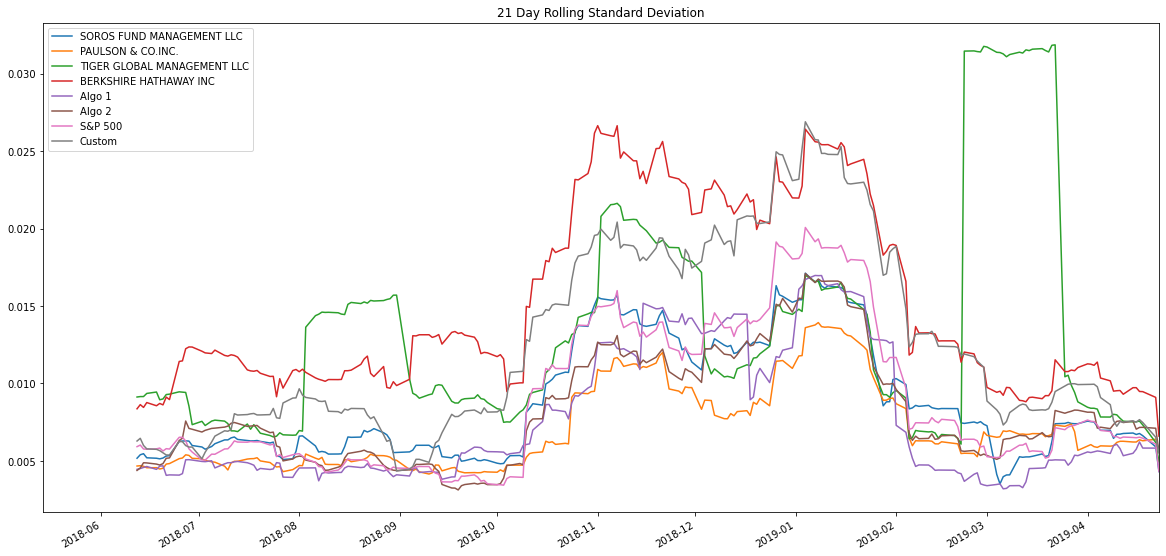

In [39]:
# Rolling
annualized_my_customize_portfolio_std = my_customize_portfolio.rolling(window=21).std()
annualized_my_customize_portfolio_std.plot(figsize=(20,10),title="21 Day Rolling Standard Deviation").set_xlim(pd.Timestamp('2018-05-14'), pd.Timestamp('2019-04-23'));

In [40]:
# Annualized Sharpe Ratios
my_portfolio_shape_ratios = (my_customize_portfolio.mean() * 252) / (my_customize_portfolio.std() * np.sqrt(252))
my_portfolio_shape_ratios

SOROS FUND MANAGEMENT LLC      0.430713
PAULSON & CO.INC.              0.258738
TIGER GLOBAL MANAGEMENT LLC   -1.034216
BERKSHIRE HATHAWAY INC         0.159756
Algo 1                         2.035665
Algo 2                         0.080607
S&P 500                        0.584820
Custom                         0.933123
dtype: float64

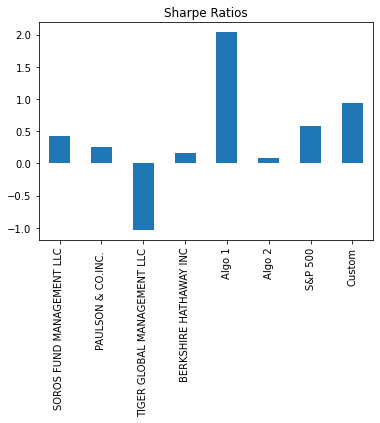

In [41]:
# Visualize the sharpe ratios as a bar plot
my_portfolio_shape_ratios.plot(kind='bar', title='Sharpe Ratios')

In [42]:
# Create a correlation analysis
# My portfolio is highly correlated with S&P 500.
my_customize_portfolio_corr = my_customize_portfolio.corr()
my_customize_portfolio_corr

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,S&P 500,Custom
SOROS FUND MANAGEMENT LLC,1.000000,0.791962,0.478627,0.816675,0.337826,0.862846,0.876981,0.733250
PAULSON & CO.INC.,0.791962,1.000000,0.485375,0.650758,0.361301,0.783656,0.766680,0.644210
TIGER GLOBAL MANAGEMENT LLC,0.478627,0.485375,1.000000,0.325457,0.114554,0.409496,0.481030,0.391972
BERKSHIRE HATHAWAY INC,0.816675,0.650758,0.325457,1.000000,0.327000,0.782804,0.852303,0.801158
Algo 1,0.337826,0.361301,0.114554,0.327000,1.000000,0.365512,0.289358,0.261471
Algo 2,0.862846,0.783656,0.409496,0.782804,0.365512,1.000000,0.875721,0.739936
S&P 500,0.876981,0.766680,0.481030,0.852303,0.289358,0.875721,1.000000,0.871875
Custom,0.733250,0.644210,0.391972,0.801158,0.261471,0.739936,0.871875,1.000000


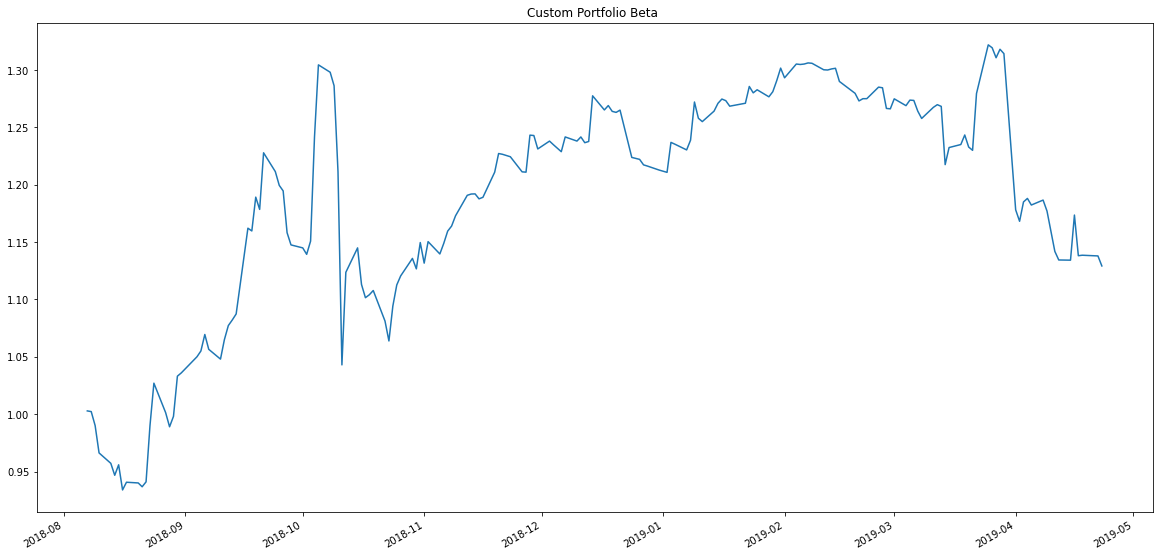

In [43]:
# Beta
# calculuate covariance
my_customize_portfolio_covariance = my_customize_portfolio['Custom'].rolling(window=60).cov(my_customize_portfolio['S&P 500'])

#variance of the general market
my_customize_portfolio_variance = my_customize_portfolio['S&P 500'].rolling(window=60).var()

# get the beta
my_customize_portfolio_beta = my_customize_portfolio_covariance/my_customize_portfolio_variance

#plotting beta over time
my_customize_portfolio_beta.plot(figsize=(20,10), title="Custom Portfolio Beta ")